In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [110]:
log = pd.read_csv('/Users/liu/Downloads/Criteo_Conversion_Search/CriteoSearchData', sep='\t', header=None)
log.columns = ['sale', 'euro', 'time_delay', 'timestamp', 'nb_clicks_1week',
               'price', 'age_group', 'device_type', 'audience', 'product_gender',
               'product_brand', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'country',
               'product_id', 'product_title', 'partner_id', 'user_id']
log['datetime'] = log['timestamp'].apply(pd.Timestamp, unit='s')
log['date'] = log['datetime'].dt.date

<ipython-input-110-ce7d5d011507>:1: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  log = pd.read_csv('/Users/liu/Downloads/Criteo_Conversion_Search/CriteoSearchData', sep='\t', header=None)


In [111]:
log.head()

,sale,euro,time_delay,timestamp,nb_clicks_1week,price,age_group,device_type,audience,product_gender,...,c5,c6,c7,country,product_id,product_title,partner_id,user_id,datetime,date
0,0,-1.0,-1,1598891820,-1,0.0,-1,7E56C27BFF0305E788DA55A029EC4988,-1,-1,...,-1,-1,-1,57A1D462A03BD076E029CF9310C11FC5,A66DB02AC1726A8D79C518B7F7AB79F0,-1,E3DDEB04F8AFF944B11943BB57D2F620,493CFB4A87C50804C94C0CF76ABD19CD,2020-08-31 16:37:00,2020-08-31
1,0,-1.0,-1,1598925284,0,0.0,4C90FD52FC53D2C1C205844CB69575AB,D7D1FB49049702BF6338894757E0D959,-1,1B491180398E2F0390E6A588B3BCE291,...,-1,-1,-1,57A1D462A03BD076E029CF9310C11FC5,4C6C62203B4CE5AA6DFCF17F2604DC37,3CE3D1623D32FB2A901822910AF72A0B C83584C673752...,BD01BAFAE73CF38C403978BBB458300C,D0EBCD4402172AE3AA6FD21FB77BDE84,2020-09-01 01:54:44,2020-09-01
2,0,-1.0,-1,1598892568,-1,0.0,-1,7E56C27BFF0305E788DA55A029EC4988,-1,-1,...,-1,-1,-1,-1,-1,-1,C4D189327BD87FEB3BF896DA716C6995,E8A8BEA257B19574C36108D0F0CDADE5,2020-08-31 16:49:28,2020-08-31
3,0,-1.0,-1,1598891174,-1,0.0,-1,D7D1FB49049702BF6338894757E0D959,B0E6BD3ACC0707BAB31CA2C2B08E652F,-1,...,-1,-1,-1,-1,-1,-1,440255DF62CFD36FBC0206828FC488E0,9703077BD18F430BD232A6F74931928E,2020-08-31 16:26:14,2020-08-31
4,0,-1.0,-1,1598905245,-1,0.0,-1,7E56C27BFF0305E788DA55A029EC4988,-1,-1,...,-1,-1,-1,57A1D462A03BD076E029CF9310C11FC5,5F4AFF2693601C2EFFE9AF2C1ED4222E,-1,E3DDEB04F8AFF944B11943BB57D2F620,703B8CFC8D65A67BDF96595CCF992D27,2020-08-31 20:20:45,2020-08-31


In [3]:
# B442064C9D31A52BCAE0D18212FCFA1E low
# 0CAD35A37452D99F0BE65C9299EBF729 middle
# 917676DCA7640B0256200468FB76B7BD high

In [4]:
low = log[log['product_id'] == 'B442064C9D31A52BCAE0D18212FCFA1E']
middle = log[log['product_id'] == '0CAD35A37452D99F0BE65C9299EBF729']
high = log[log['product_id'] == '917676DCA7640B0256200468FB76B7BD']

In [5]:
# first we check whether the clicks are stable throughout the sample days
## middle
middle_clicks_by_date = middle.groupby('date')['sale'].count()
middle_sales_by_date = middle[middle['sale'] == 1].groupby('date')['sale'].count()
middle_clicks_by_date.name = 'click'
middle_conversion = pd.DataFrame(middle_clicks_by_date).join(middle_sales_by_date)
middle_conversion['conversion_rate'] = middle_conversion['sale'] / middle_conversion['click']

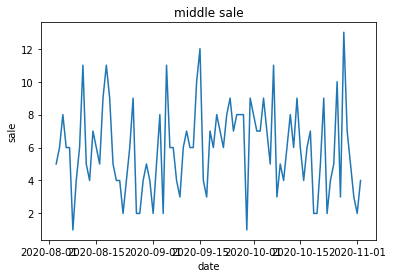

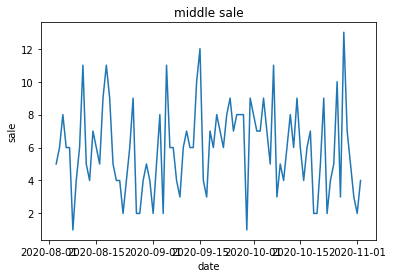

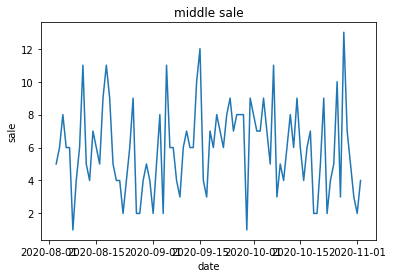

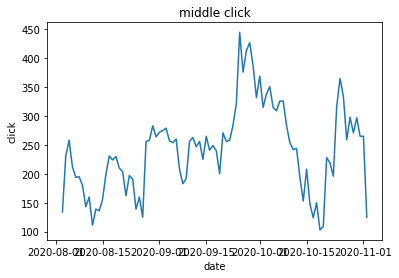

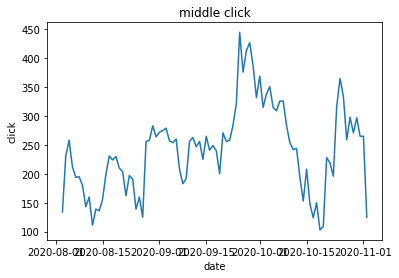

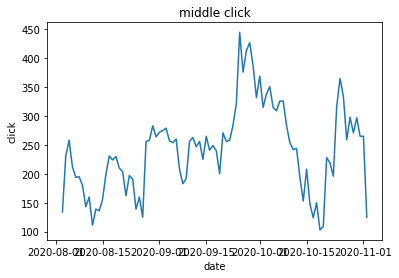

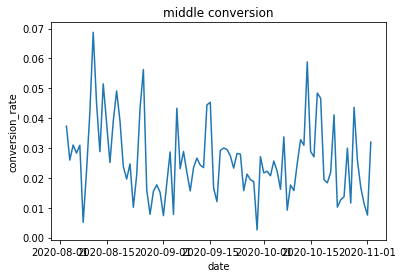

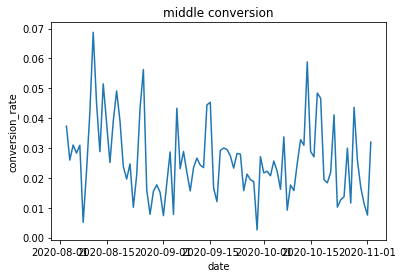

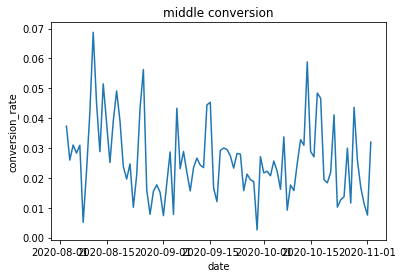

In [6]:
sns.lineplot(data=middle_conversion['sale'])
plt.title('middle sale')
plt.show()
sns.lineplot(data=middle_conversion['click'])
plt.title('middle click')
plt.show()
sns.lineplot(data=middle_conversion['conversion_rate'])
plt.title('middle conversion')
plt.show()

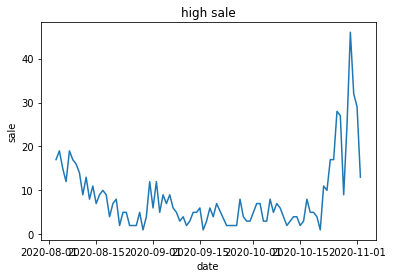

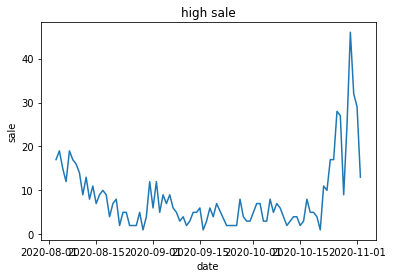

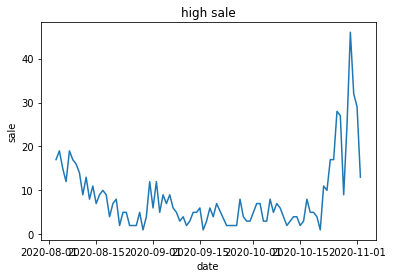

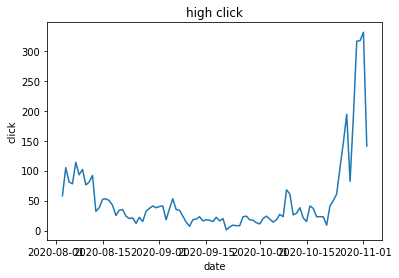

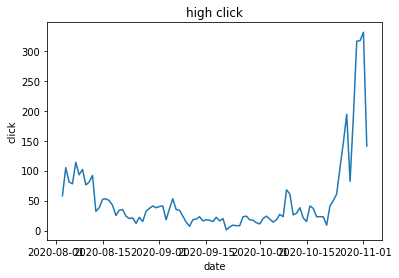

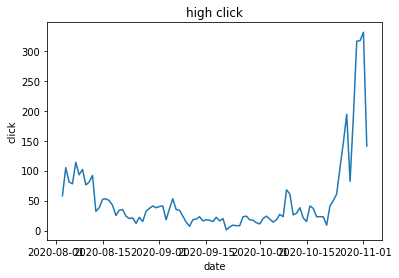

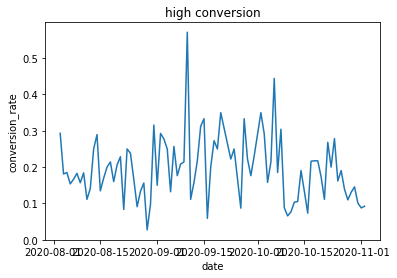

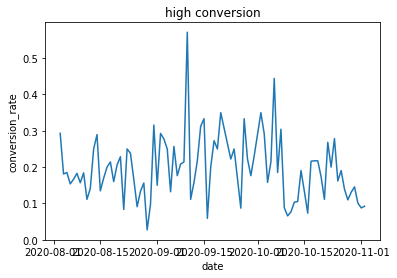

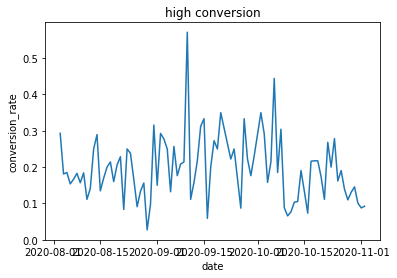

In [7]:
## high
high_clicks_by_date = high.groupby('date')['sale'].count()
high_sales_by_date = high[high['sale'] == 1].groupby('date')['sale'].count()
high_clicks_by_date.name = 'click'
high_conversion = pd.DataFrame(high_clicks_by_date).join(high_sales_by_date)
high_conversion['conversion_rate'] = high_conversion['sale'] / high_conversion['click']
sns.lineplot(data=high_conversion['sale'])
plt.title('high sale')
plt.show()
sns.lineplot(data=high_conversion['click'])
plt.title('high click')
plt.show()
sns.lineplot(data=high_conversion['conversion_rate'])
plt.title('high conversion')
plt.show()

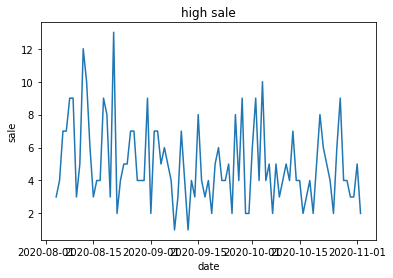

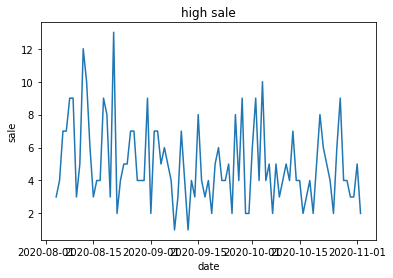

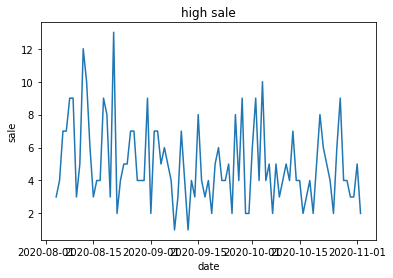

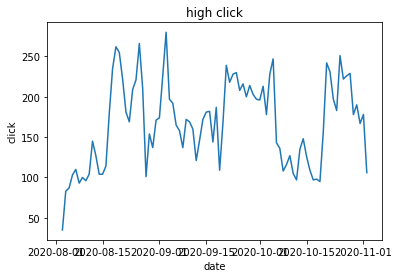

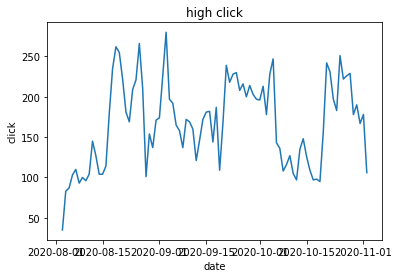

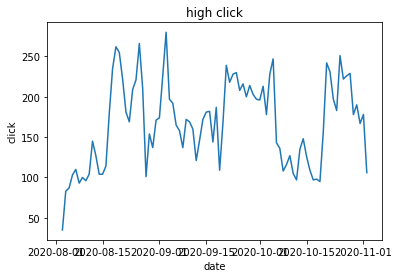

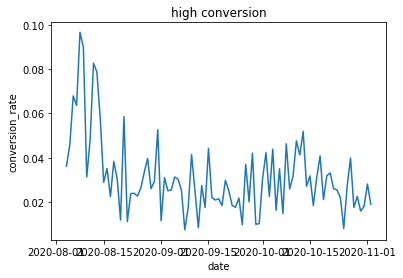

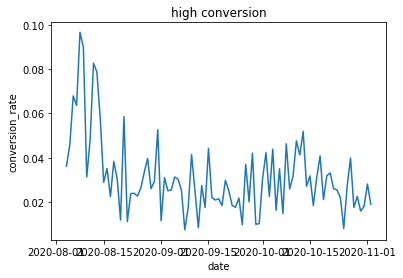

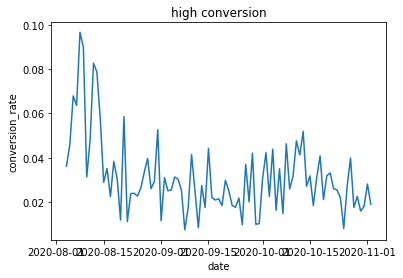

In [8]:
## low
low_clicks_by_date = low.groupby('date')['sale'].count()
low_sales_by_date = low[low['sale'] == 1].groupby('date')['sale'].count()
low_clicks_by_date.name = 'click'
low_conversion = pd.DataFrame(low_clicks_by_date).join(low_sales_by_date)
low_conversion['conversion_rate'] = low_conversion['sale'] / low_conversion['click']
sns.lineplot(data=low_conversion['sale'])
plt.title('high sale')
plt.show()
sns.lineplot(data=low_conversion['click'])
plt.title('high click')
plt.show()
sns.lineplot(data=low_conversion['conversion_rate'])
plt.title('high conversion')
plt.show()

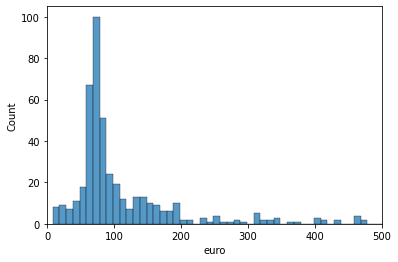

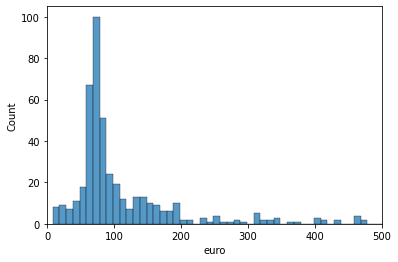

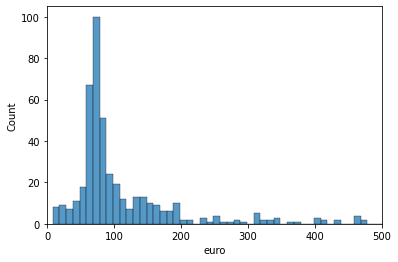

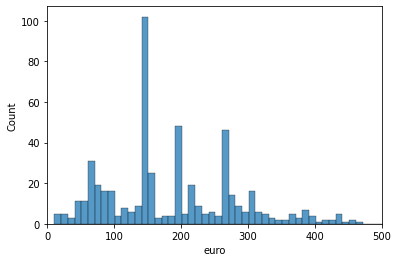

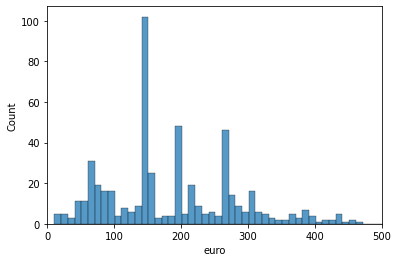

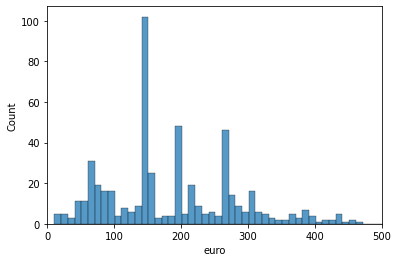

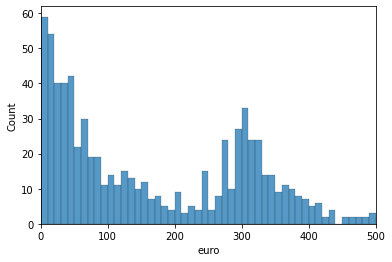

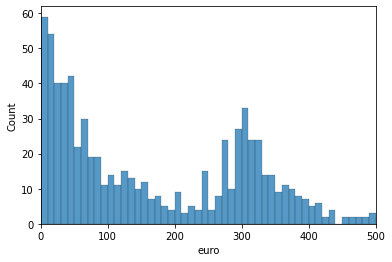

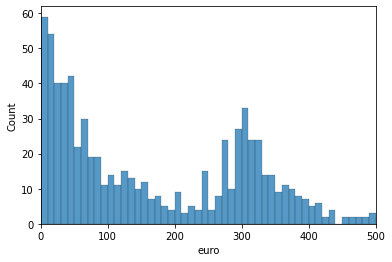

In [9]:
sns.histplot(low[low['sale']==1]['euro'], binwidth=10)
plt.xlim([0, 500])
plt.show()
sns.histplot(middle[middle['sale']==1]['euro'], binwidth=10)
plt.xlim([0, 500])
plt.show()
sns.histplot(high[high['sale']==1]['euro'], binwidth=10)
plt.xlim([0, 500])
plt.show()

# Price set and Demand

## low

In [10]:
# price set 0 - 500 50 prices
price_set = np.linspace(10, 500, 50)

In [11]:
groups = np.append(-1, price_set)
groups[-1] = np.inf

In [12]:
dataset = low
value_low = pd.DataFrame(np.histogram(dataset[dataset['sale']==1]['euro'], groups)[0])
value_low = value_low.rename(columns={0:'count'})
value_low['purchase'] = value_low.loc[::-1, 'count'].cumsum()[::-1]
value_low['demand'] = value_low['purchase'] / value_low['purchase'].max()
value_low.index = price_set
value_low['revenue'] = value_low.index * value_low['demand']

70.0
70.0
70.0


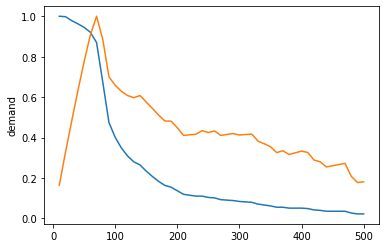

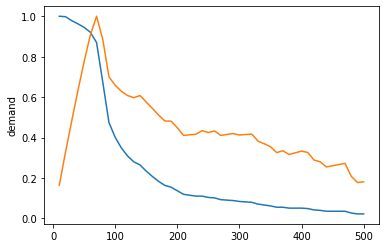

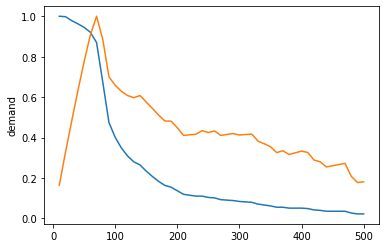

In [31]:
sns.lineplot(x=value_low.index, y=value_low.demand)
sns.lineplot(x=value_low.index, y=value_low.revenue/value_low.revenue.max())
print(price_set[np.argmax(value_low.revenue)])

# middle

In [14]:
dataset = middle
value_middle = pd.DataFrame(np.histogram(dataset[dataset['sale']==1]['euro'], groups)[0])
value_middle = value_middle.rename(columns={0:'count'})
value_middle['purchase'] = value_middle.loc[::-1, 'count'].cumsum()[::-1]
value_middle['demand'] = value_middle['purchase'] / value_middle['purchase'].max()
value_middle.index = price_set
value_middle['revenue'] = value_middle.index * value_middle['demand']

150.0
150.0
150.0


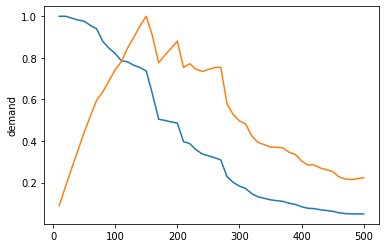

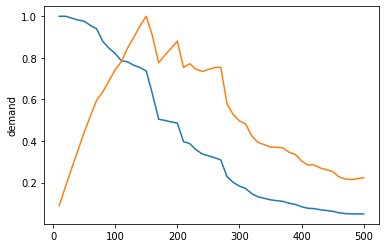

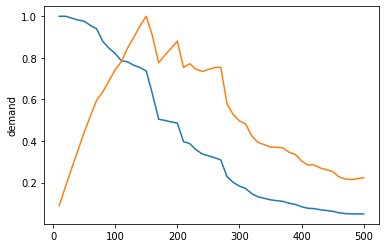

In [32]:
sns.lineplot(x=value_middle.index, y=value_middle.demand)
sns.lineplot(x=value_middle.index, y=value_middle.revenue/value_middle.revenue.max())
print(price_set[np.argmax(value_middle.revenue)])

# high

In [16]:
dataset = high
value_high = pd.DataFrame(np.histogram(dataset[dataset['sale']==1]['euro'], groups)[0])
value_high = value_high.rename(columns={0:'count'})
value_high['purchase'] = value_high.loc[::-1, 'count'].cumsum()[::-1]
value_high['demand'] = value_high['purchase'] / value_high['purchase'].max()
value_high.index = price_set
value_high['revenue'] = value_high.index * value_high['demand']

280.0
280.0
280.0


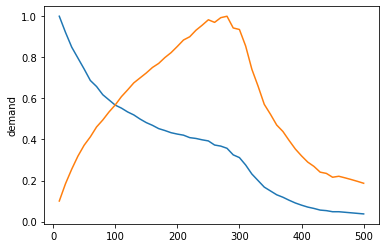

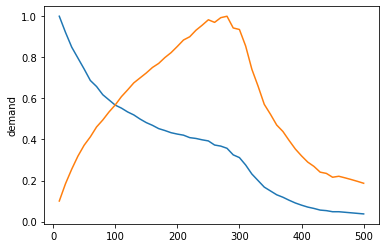

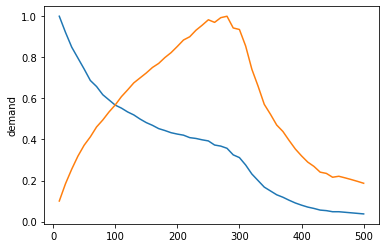

In [33]:
sns.lineplot(x=value_high.index, y=value_high.demand)
sns.lineplot(x=value_high.index, y=value_high.revenue / value_high.revenue.max())
print(price_set[np.argmax(value_high.revenue)])

# clicks and conversion

In [34]:
print(low_conversion['conversion_rate'].mean())
print(middle_conversion['conversion_rate'].mean())
print(high_conversion['conversion_rate'].mean())

0.03140265910455081
0.02618189248801215
0.1944247585651741
0.03140265910455081
0.02618189248801215
0.1944247585651741
0.03140265910455081
0.02618189248801215
0.1944247585651741


In [48]:
print(low_conversion['click'].mean())
print(middle_conversion['click'].mean())
print(high_conversion['click'].mean())

167.70652173913044
242.1195652173913
50.67391304347826
167.70652173913044
242.1195652173913
50.67391304347826
167.70652173913044
242.1195652173913
50.67391304347826


# Simulation Data

In [71]:
high_conversion.to_csv('click_data.csv', index=True)
value_low.to_csv('value_low.csv', index=True)
value_middle.to_csv('value_middle.csv', index=True)
value_high.to_csv('value_high.csv', index=True)

In [108]:
sum(np.random.binomial(1,0.2*0.1,100) / 100 * 100)

3.0

3.0

3.0